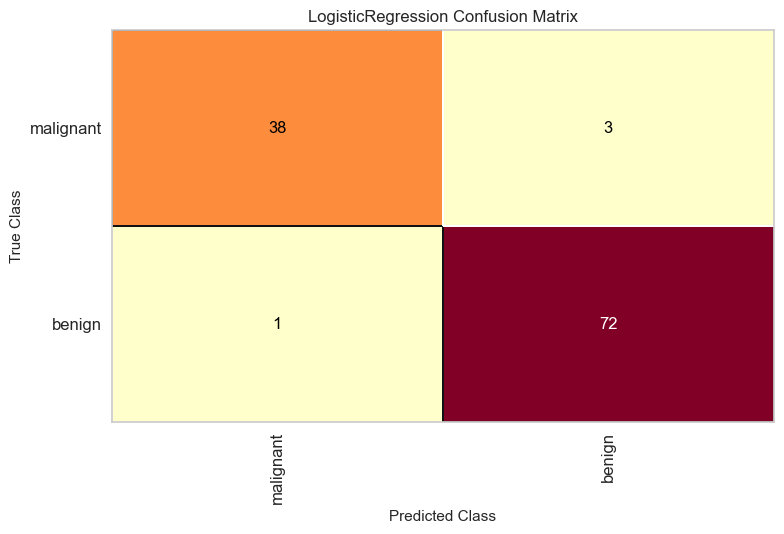

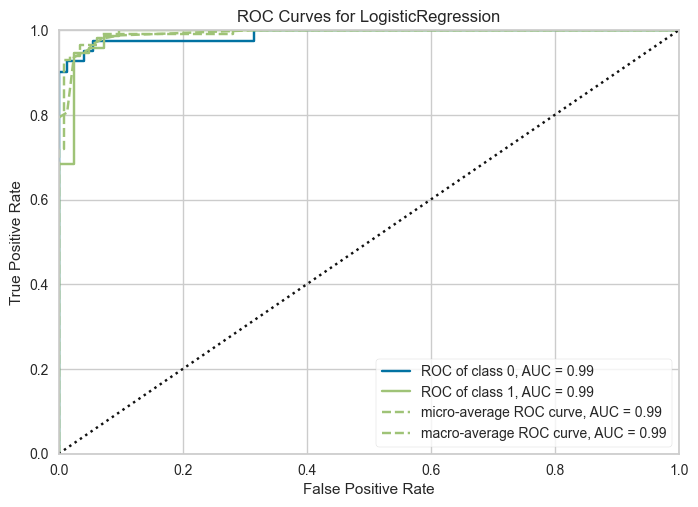

<Axes: title={'center': 'ROC Curves for LogisticRegression'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [19]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from yellowbrick.classifier import ConfusionMatrix, ROCAUC
import pandas as pd

# df = pd.read_csv(r"code/data/breast_cancer.csv")
# df

# Step 1: Load the dataset
data = load_breast_cancer()

# print(data)
# data.feature_names
# print(data.keys())
X = data.data          
y = data.target        

# Step 2: Split the data into 80% train and 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Step 3: Scale the features 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 4: Create a logistic regression model
model = LogisticRegression(max_iter=1000)

# Step 5: Confusion Matrix visualization
confusion_viz = ConfusionMatrix(model, classes=data.target_names)
confusion_viz.fit(X_train_scaled, y_train)
confusion_viz.score(X_test_scaled, y_test)
confusion_viz.show()

# Step 6: ROC-AUC Curve visualization
roc_viz = ROCAUC(model)
roc_viz.fit(X_train_scaled, y_train)
roc_viz.score(X_test_scaled, y_test)
roc_viz.show()


In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

# Step 1: Load 
data = pd.read_csv(r"code/data/breast_cancer.csv")
# data
# data.head()

# Step 2: Encode the diagnosis  M-1 and B-0
label_encoder = LabelEncoder()
data['M'] = label_encoder.fit_transform(data['M'])

# Step 3: Remove 'id' column not useful for prediction only if exists
if 'id' in data.columns:
    data = data.drop(columns='id')

# Step 4: Split the dataset into features X and target y
X = data.drop(columns='M')  
y = data['M']               

# Step 5: Split data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Step 6: Pipeline with MinMaxScaler and Logistic Regression
pipe = Pipeline([
    ('scaler', MinMaxScaler()),                  # Scale features between 0 and 1
    ('lr', LogisticRegression(max_iter=1000))   
])

# Step 7: Parameter grid for GridSearchCV
param_grid = { 'lr__C': [0.1, 1, 10]}

# Step 8: Use GridSearchCV to find the best value for C
grid = GridSearchCV(pipe, param_grid, cv=5)  
grid.fit(X_train, y_train)                  

# Step 9: Using model make Predictions on the test data
y_pred = grid.predict(X_test)

# Step 10: Print the best C value found
print("Best C value from GridSearch:", grid.best_params_)

# Step 11: Classification report precision, recall, f1-score
print(classification_report(y_test, y_pred))


Best C value from GridSearch: {'lr__C': 10}
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        80
           1       0.97      1.00      0.99        34

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114

